In [26]:
import numpy as np
import pandas as pd
from sklearn import datasets
#
from sklearn import model_selection
from sklearn import metrics

dataset = datasets.load_diabetes()


In [27]:
X = dataset.data
y = dataset.target
print(X.shape) #(442, 10)
print(y.shape) #(442,)

(442, 10)
(442,)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [29]:
W = np.random.rand(10)
b = np.random.rand()

In [30]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [31]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [32]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [33]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [34]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.49833307  -13.71502499 -189.48660803 -142.50478     -68.27619173
  -56.02886676  127.61420919 -138.98264037 -182.77639361 -123.41601697]
db: -302.6342335124779


In [35]:
LEARNING_RATE = 0.01
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 21359.3028
Iteration 20 : Loss 15905.1646
Iteration 30 : Loss 12214.0510
Iteration 40 : Loss 9704.6808
Iteration 50 : Loss 7988.5168
Iteration 60 : Loss 6805.7343
Iteration 70 : Loss 5982.4751
Iteration 80 : Loss 5402.3105
Iteration 90 : Loss 4987.1879
Iteration 100 : Loss 4684.7087
Iteration 110 : Loss 4459.6319
Iteration 120 : Loss 4288.1994
Iteration 130 : Loss 4154.3444
Iteration 140 : Loss 4047.1578
Iteration 150 : Loss 3959.1942
Iteration 160 : Loss 3885.3389
Iteration 170 : Loss 3822.0488
Iteration 180 : Loss 3766.8451
Iteration 190 : Loss 3717.9716
Iteration 200 : Loss 3674.1659
Iteration 210 : Loss 3634.5054
Iteration 220 : Loss 3598.3028
Iteration 230 : Loss 3565.0362
Iteration 240 : Loss 3534.3003
Iteration 250 : Loss 3505.7744
Iteration 260 : Loss 3479.1991
Iteration 270 : Loss 3454.3611
Iteration 280 : Loss 3431.0821
Iteration 290 : Loss 3409.2104
Iteration 300 : Loss 3388.6161
Iteration 310 : Loss 3369.1862
Iteration 320 : Loss 3350.8218
Iteration 330 

In [36]:
W, b

(array([  48.25837718, -170.10791737,  470.53846166,  306.71885205,
         -51.69558246,  -99.99535336, -209.69992113,  145.32489729,
         350.92640958,  133.00909743]),
 151.490933291188)

In [37]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2867.2796635598647

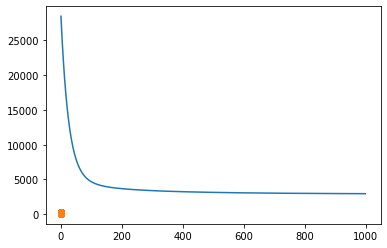

In [38]:
import matplotlib.pyplot as plt
plt.plot(losses)

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [ ]:
1. 처음에 데이터 관련 전처리를 모두 하고 진행하는게 효율적이다.
2. 자주 사용하는 method는 복붙이 편리하다.
3. 싸이킷을 통해서 쉽게 손실함수의 최소값을 구하는 게 편하지만, 이렇게 과정을 이해하는 게 도움이 되었다.
4. 학습률의 조정에 따라서 결과값이 크게 달라지는 것을 보았다.